In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option("display.max_rows",None) #full dataset loading in notebook view
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [65]:
df = pd.read_csv('heart.csv')
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [67]:
df.shape

(918, 12)

In [68]:
df.size

11016

In [69]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)
    
dataset_description(df)
    

No. of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [70]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [71]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [72]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [73]:
df.corr(numeric_only=True)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [74]:

df.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [75]:
df.corr(numeric_only=True)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [76]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [77]:
df.skew(numeric_only=True)


Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [78]:
df.skew(numeric_only=True)

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

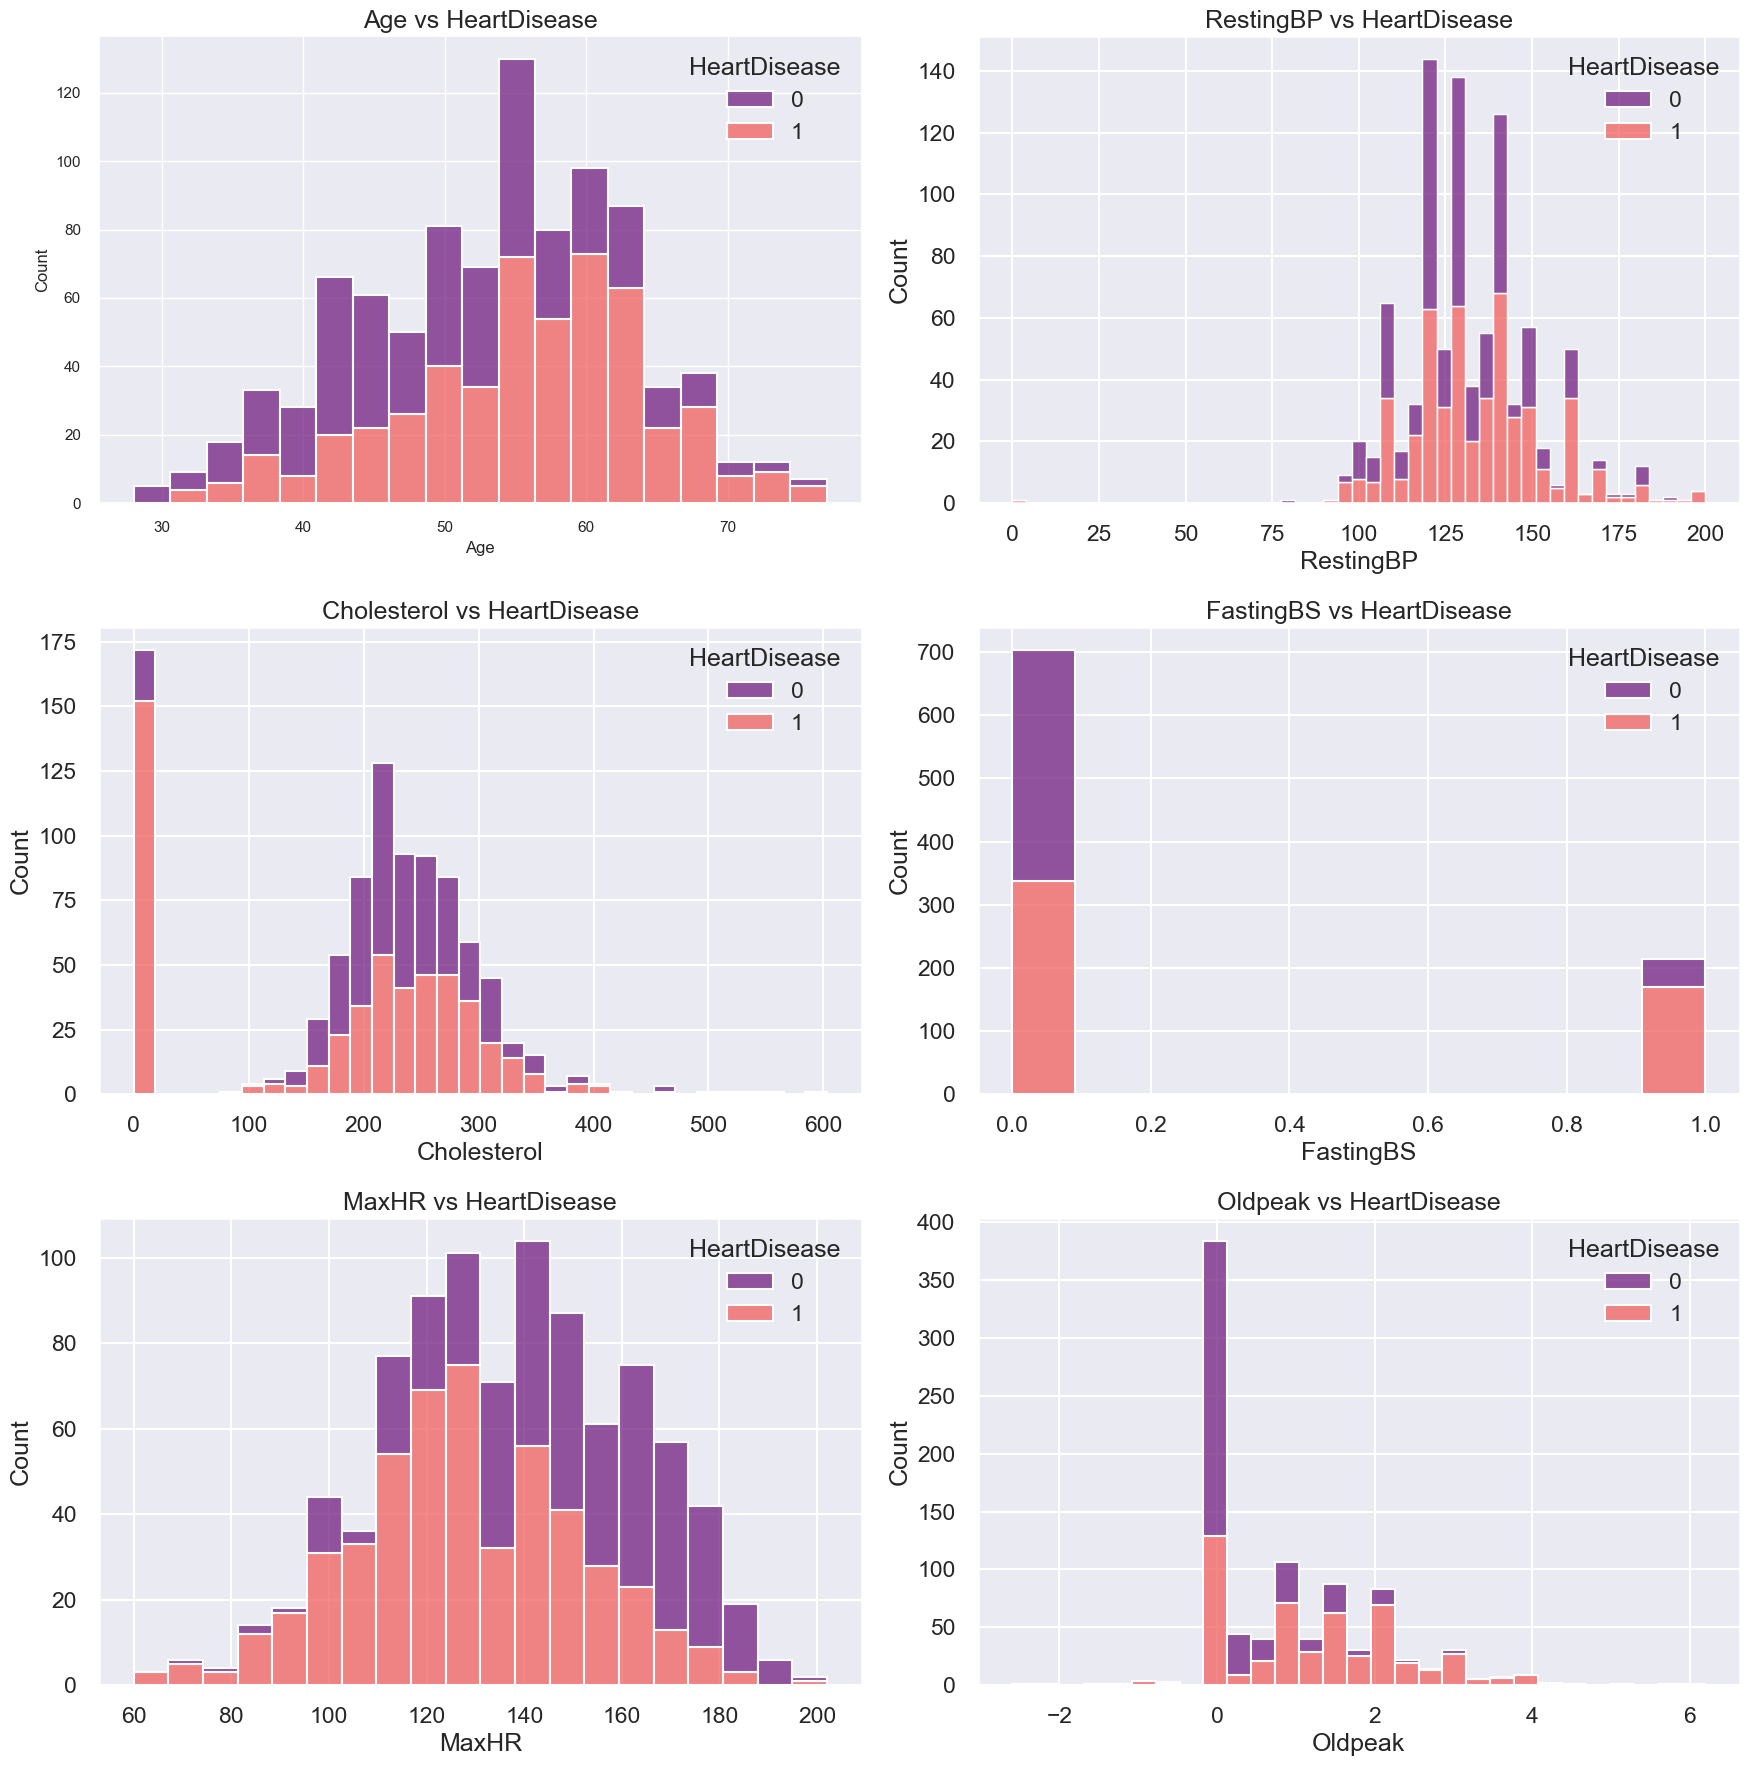

In [79]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

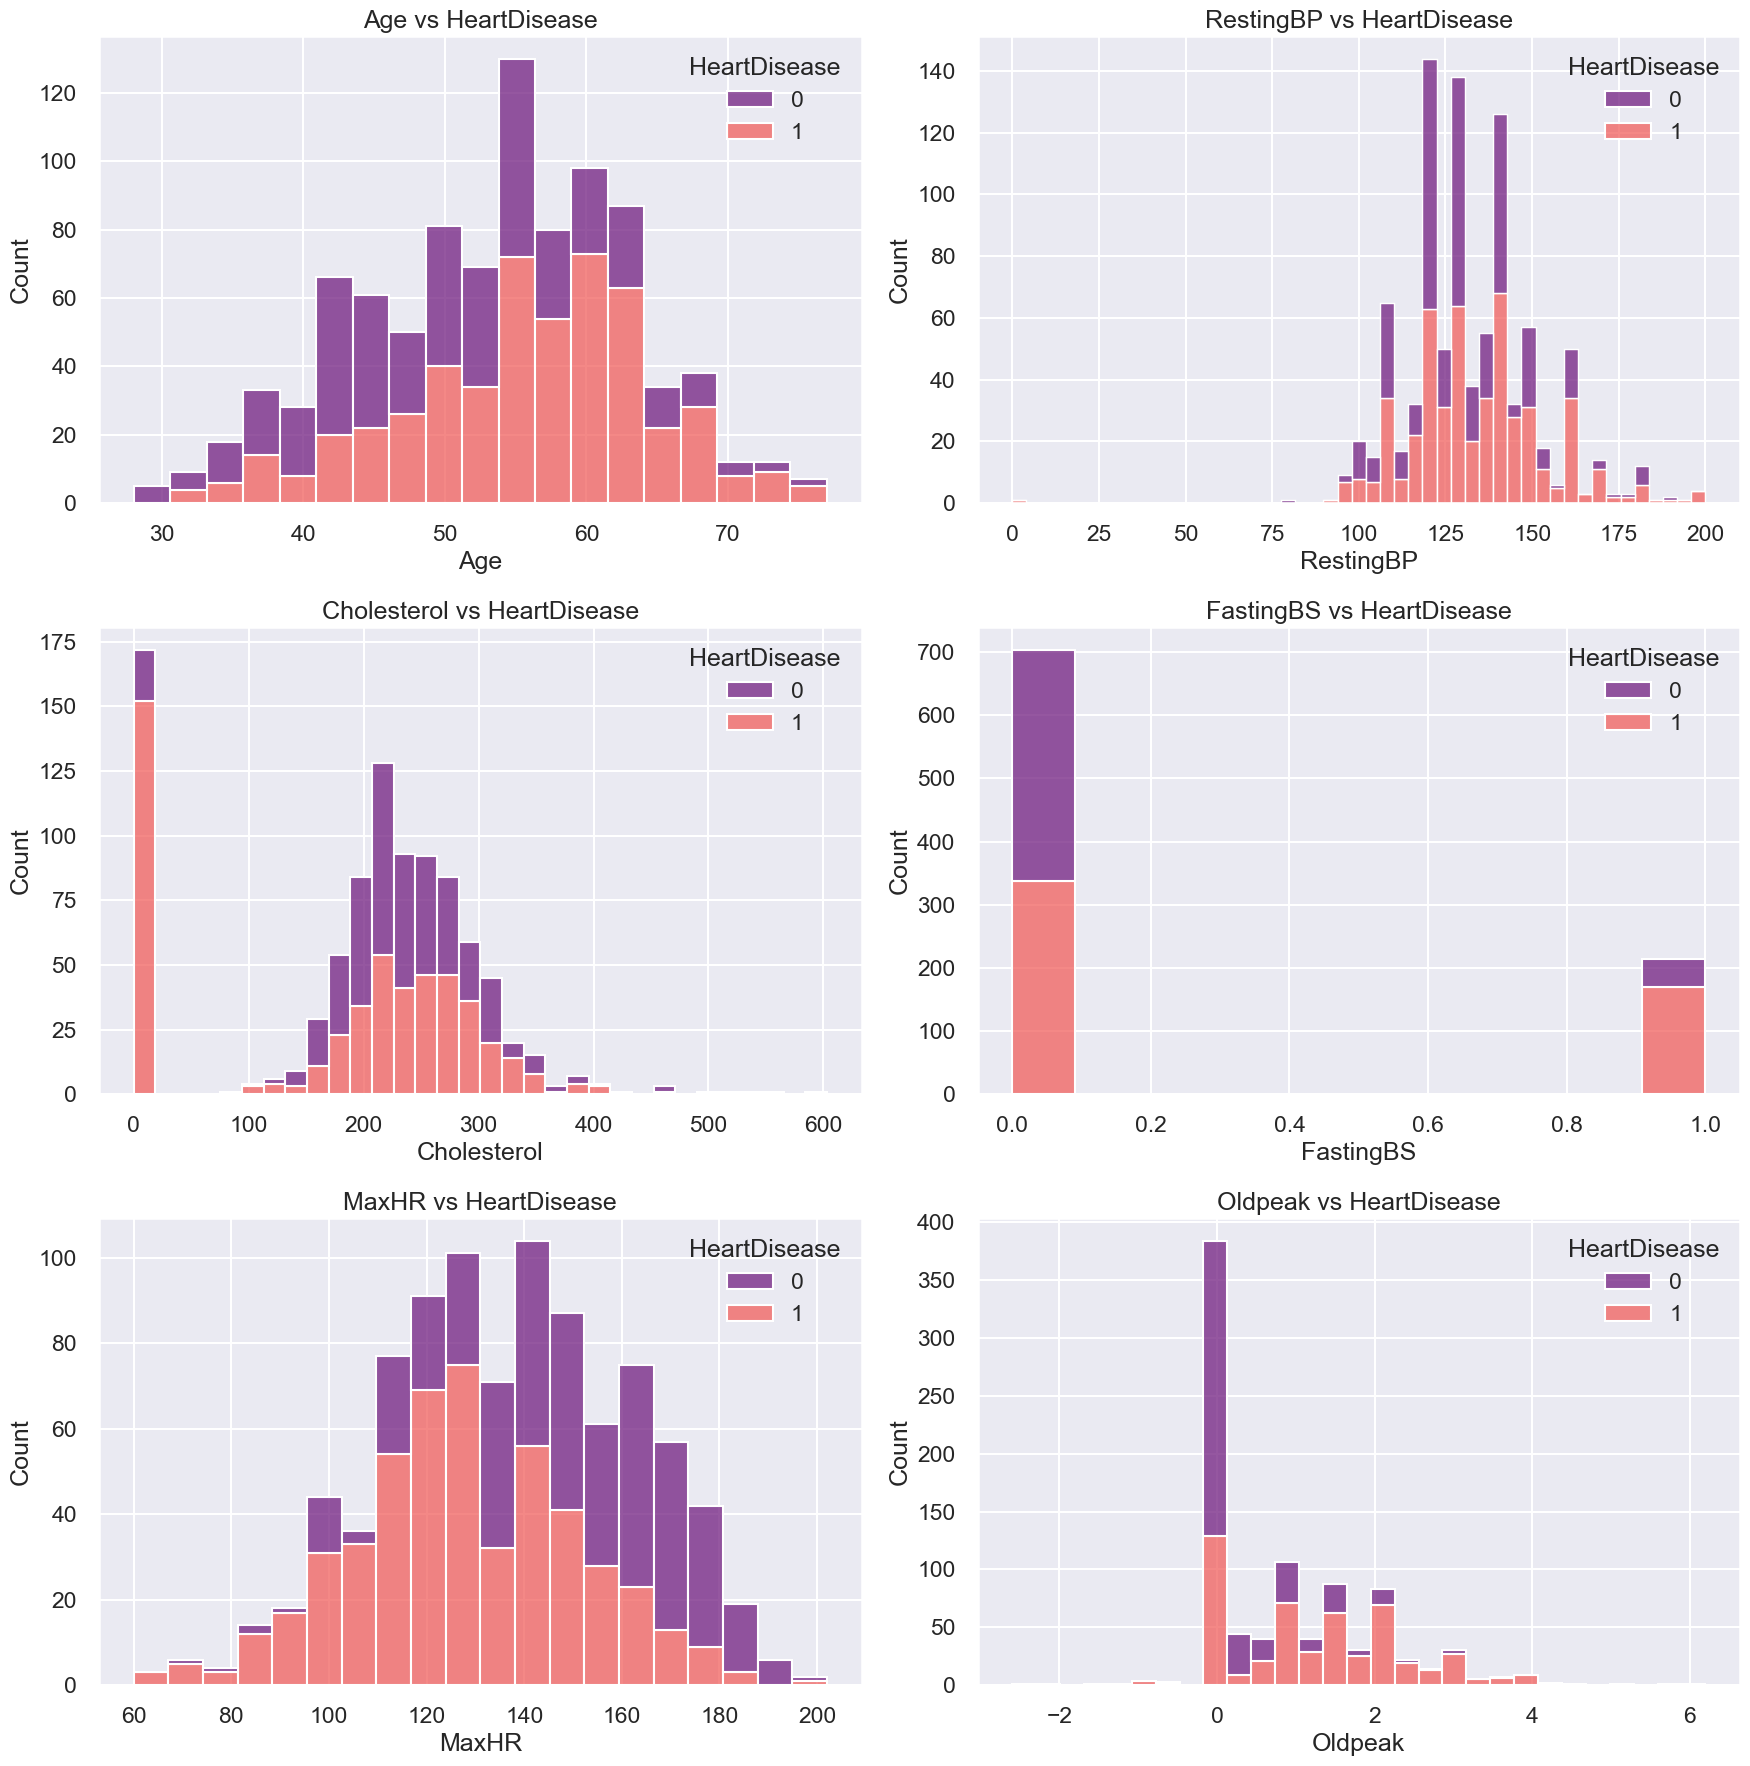

In [80]:
plt.figure(figsize=(18,18))

plt.subplot(3,2,1)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('seaborn-v0_8')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease", multiple="stack", palette='magma')
plt.title('Oldpeak vs HeartDisease')

plt.show()


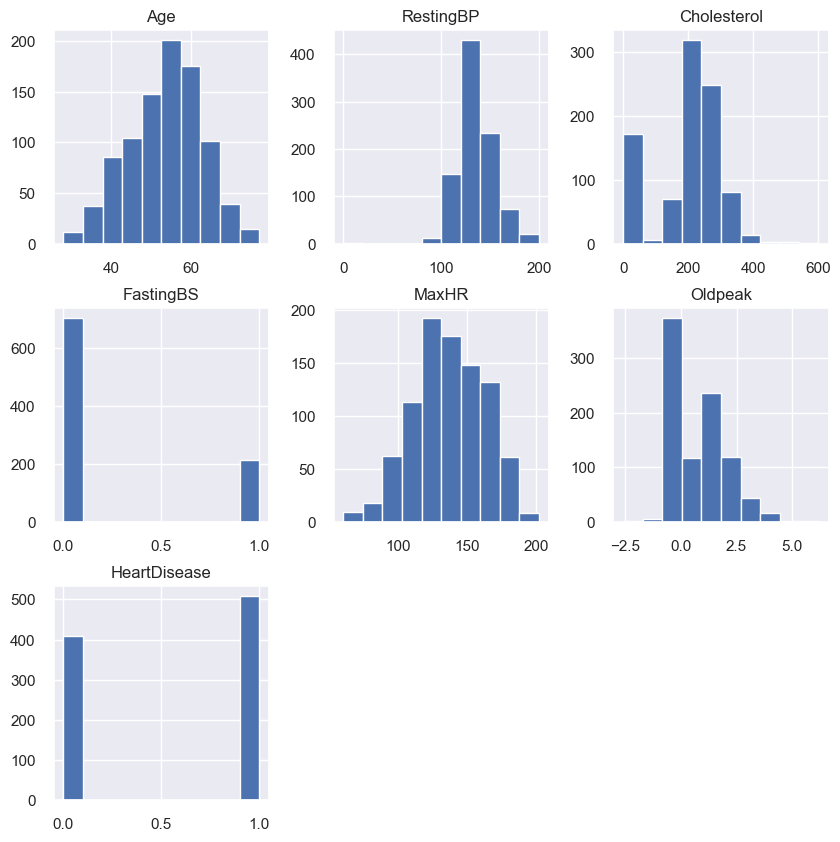

In [81]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

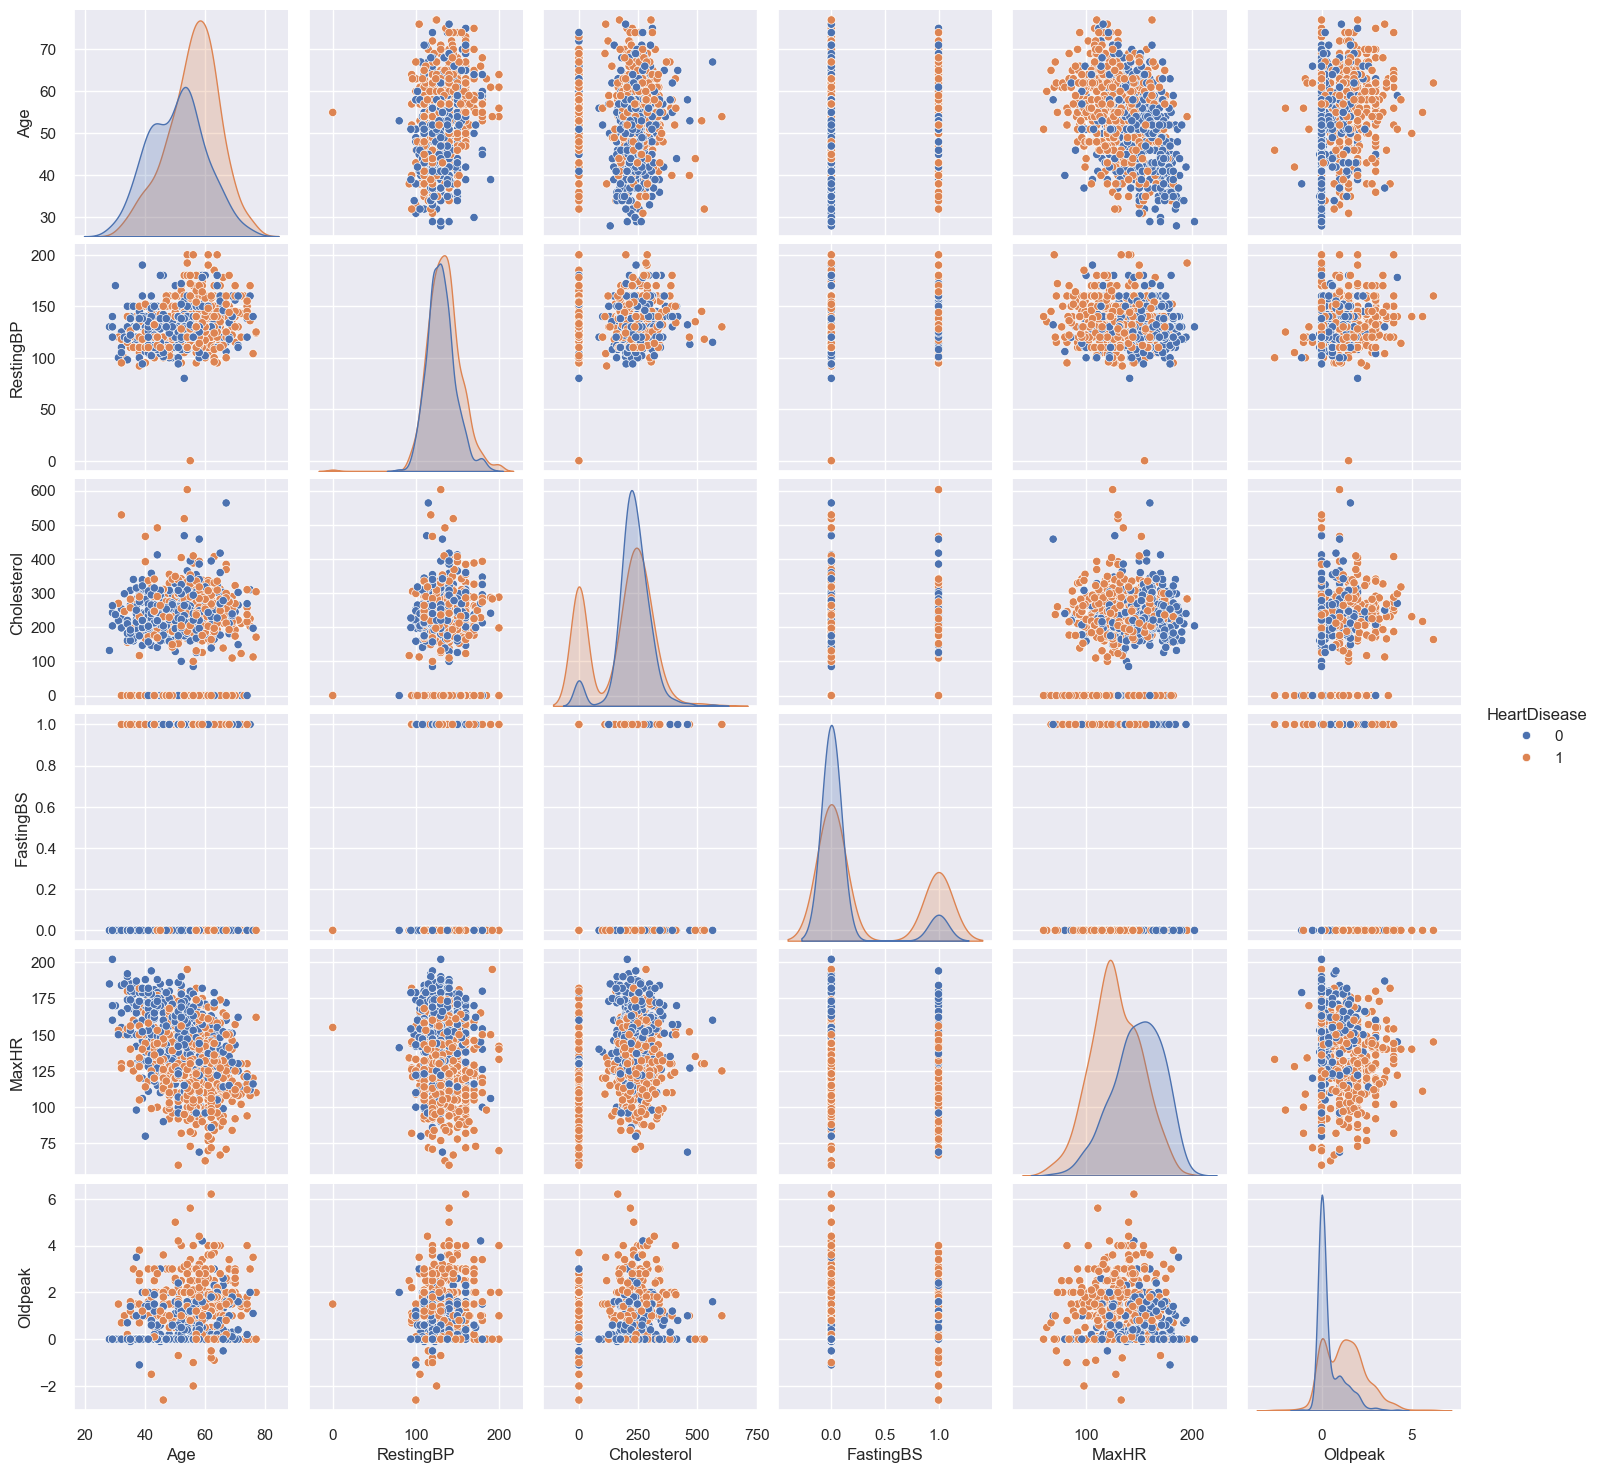

In [82]:
sns.pairplot(df,hue='HeartDisease')

In [83]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1
# average age is same for both male and female

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [84]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

In [85]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25]) 
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [86]:
outliers_graph(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [87]:
outliers_graph(df['RestingBP'])

Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 26


In [88]:

df=df[df.RestingBP>=90]
len(df)


916

In [89]:
outliers_graph(df['Cholesterol'])

Q25:  174.75
Q75:  267.0
Inter Quartile Range:  92.25
Outliers lie before 36.375 and beyond 405.375
Number of Rows with Left Extreme Outliers: 170
Number of Rows with Right Extreme Outliers: 12


In [90]:
df=df[df.Cholesterol<=450]  #due more value in the right extreme outlier and '0' cholesterol level in dataset
len(df)

908

In [91]:
outliers_graph(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 211


In [92]:
outliers_graph(df['MaxHR'])

Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0


In [93]:
df=df[df.MaxHR>=70]
len(df)

905

In [94]:
outliers_graph(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 15


In [95]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.12817679558012
Median:  222.0


In [96]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  241.7357723577236


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,905.0,53.522652,9.434672,28.0,47.0,54.0,60.0,77.0
RestingBP,905.0,132.632044,17.989810,92.0,120.0,130.0,140.0,200.0
Cholesterol,905.0,197.128177,105.005105,0.0,175.0,222.0,266.0,417.0
FastingBS,905.0,0.232044,0.422370,0.0,0.0,0.0,0.0,1.0
MaxHR,905.0,137.101657,25.156164,70.0,120.0,138.0,156.0,202.0
Oldpeak,905.0,0.889834,1.070970,-2.6,0.0,0.6,1.5,6.2
HeartDisease,905.0,0.551381,0.497628,0.0,0.0,1.0,1.0,1.0


In [98]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) 
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull') 
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)

In [99]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,False,False,True,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,True,False,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,False,False,True,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,False,True,False,True,True,False,False,False,True


In [100]:
df.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

In [101]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol

In [102]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]
 
# printing the altered DataFrame
df.head(5)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,True,False,False,True,True,False,False,False,True,0
1,49,160,180.0,0,156,1.0,False,True,False,False,True,False,False,True,False,1
2,37,130,283.0,0,98,0.0,True,False,False,True,False,True,False,False,True,0
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195.0,0,122,0.0,False,True,False,True,True,False,False,False,True,0


In [103]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

,copy,True
,with_mean,True
,with_std,True


In [104]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.434086,0.409789,0.980973,-0.549689,1.388035,-0.831327,2.064371,-0.532624,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402
1,-0.479630,1.522144,-1.278327,-0.549689,0.751656,0.102922,-0.484409,1.877498,-0.23141,-1.933448,0.820261,-0.493084,-0.825927,1.003320,-0.876115
2,-1.752238,-0.146388,0.856608,-0.549689,-1.555216,-0.831327,2.064371,-0.532624,-0.23141,0.517211,-1.219124,2.028052,-0.825927,-0.996691,1.141402
3,-0.585681,0.298554,-0.573591,-0.549689,-1.157480,0.570047,-0.484409,-0.532624,-0.23141,-1.933448,0.820261,-0.493084,1.210760,1.003320,-0.876115
4,0.050623,0.965967,-0.967414,-0.549689,-0.600648,-0.831327,-0.484409,1.877498,-0.23141,0.517211,0.820261,-0.493084,-0.825927,-0.996691,1.141402


In [105]:
df.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,Sex_M,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289.0,0,172,0.0,True,False,False,True,True,False,False,False,True,0
1,49,160,180.0,0,156,1.0,False,True,False,False,True,False,False,True,False,1
2,37,130,283.0,0,98,0.0,True,False,False,True,False,True,False,False,True,0
3,48,138,214.0,0,108,1.5,False,False,False,False,True,False,True,True,False,1
4,54,150,195.0,0,122,0.0,False,True,False,True,True,False,False,False,True,0


In [106]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [107]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [108]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
cv = KFold(n_splits=10, random_state=100, shuffle=True)
model = KNeighborsClassifier(n_neighbors=36)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model = SVC(kernel='rbf')
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of SVC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
model=RandomForestClassifier(n_estimators =40,random_state=100)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of RandomForest: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy of KNN: 0.861 (0.032)
Accuracy of SVC: 0.864 (0.044)
Accuracy of RandomForest: 0.856 (0.047)


In [109]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.23348017621145375
2 0.27312775330396477
3 0.13215859030837004
4 0.19823788546255505
5 0.14096916299559473
6 0.1762114537444934
7 0.14096916299559473
8 0.15859030837004406
9 0.14096916299559473
10 0.14537444933920704
11 0.1277533039647577
12 0.14096916299559473
13 0.1277533039647577
14 0.13656387665198239
15 0.13656387665198239
16 0.13215859030837004
17 0.13656387665198239
18 0.13656387665198239
19 0.1277533039647577
20 0.13656387665198239
21 0.13215859030837004
22 0.1277533039647577
23 0.13215859030837004
24 0.13656387665198239
25 0.13656387665198239
26 0.13215859030837004
27 0.13215859030837004
28 0.12334801762114538
29 0.11894273127753303
30 0.12334801762114538
31 0.12334801762114538
32 0.1277533039647577
33 0.11894273127753303
34 0.11894273127753303
35 0.1145374449339207
36 0.11013215859030837
37 0.1145374449339207
38 0.1145374449339207
39 0.1145374449339207


Text(0, 0.5, 'Error Rate')

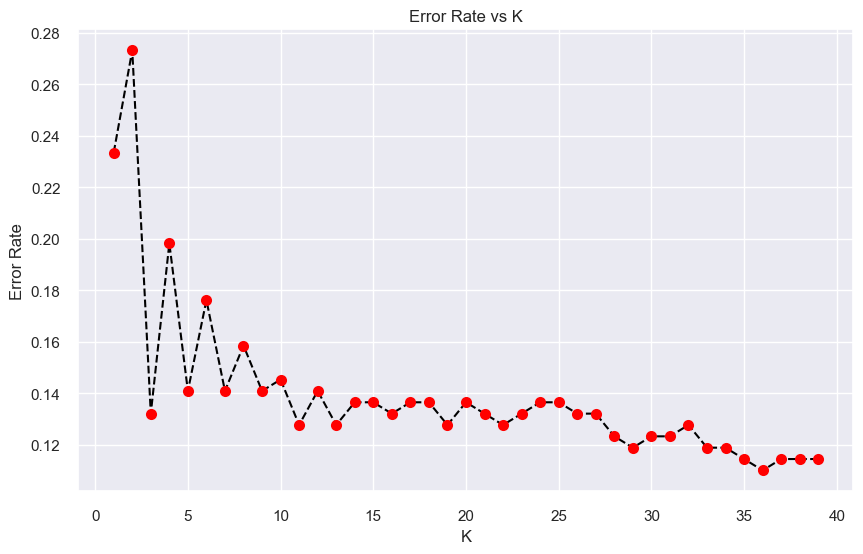

In [110]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

              precision    recall  f1-score   support

           0       0.87      0.86      0.87        94
           1       0.90      0.91      0.91       133

    accuracy                           0.89       227
   macro avg       0.89      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227


------------------------
Confusion Matrix
------------------------

[[ 81  13]
 [ 12 121]]


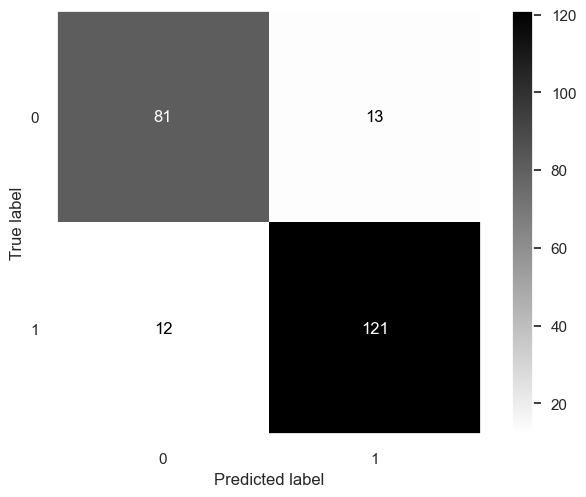

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Train model
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
print("\n------------------------")
print("Confusion Matrix")
print("------------------------\n")
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap="binary"
)

plt.grid(False)
plt.show()


              precision    recall  f1-score   support

           0       0.87      0.86      0.87        94
           1       0.90      0.91      0.91       133

    accuracy                           0.89       227
   macro avg       0.89      0.89      0.89       227
weighted avg       0.89      0.89      0.89       227



------------------------
Confusion Matrix
------------------------

[[ 81  13]
 [ 12 121]]


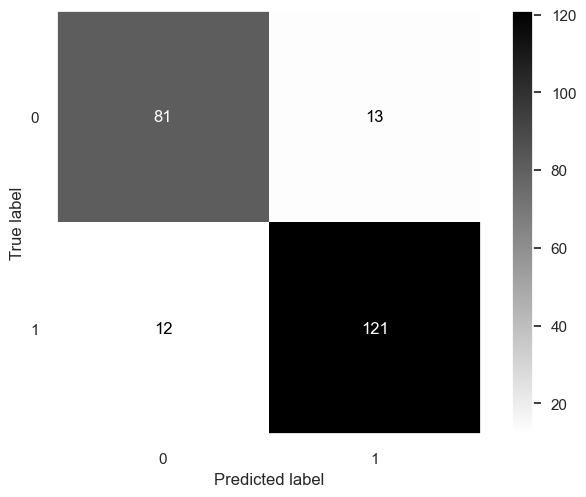

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))

# NEW & CORRECT WAY
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap="binary"
)

plt.grid(False)
plt.show()


              precision    recall  f1-score   support

           0       0.88      0.81      0.84        94
           1       0.87      0.92      0.90       133

    accuracy                           0.88       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.88      0.88      0.88       227



------------------------
Confusion Matrix
------------------------

[[ 76  18]
 [ 10 123]]


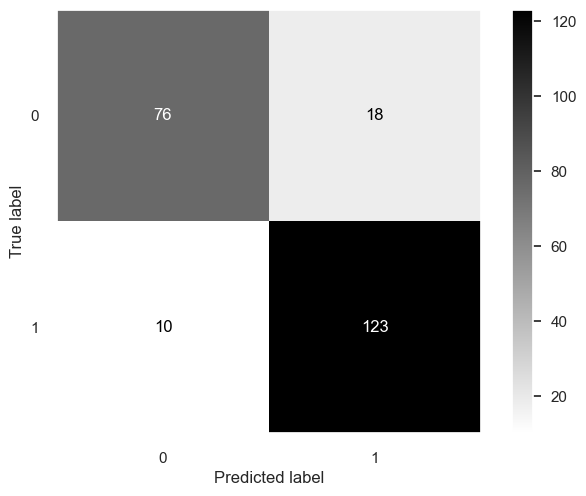

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

classifier = SVC(kernel='rbf', random_state=100)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))

# Correct replacement for plot_confusion_matrix
ConfusionMatrixDisplay.from_estimator(
    classifier,
    X_test,
    y_test,
    cmap="binary"
)

plt.grid(False)
plt.show()


In [114]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [115]:
rf = RandomForestClassifier()
forest = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest.fit(X_train,y_train)  

Fitting 3 folds for each of 100 candidates, totalling 300 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [116]:
forest.best_params_

{'n_estimators': 168,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        95
           1       0.93      0.86      0.90       132

    accuracy                           0.89       227
   macro avg       0.88      0.89      0.88       227
weighted avg       0.89      0.89      0.89       227


------------------------
Confusion Matrix
------------------------

[[ 87   8]
 [ 18 114]]


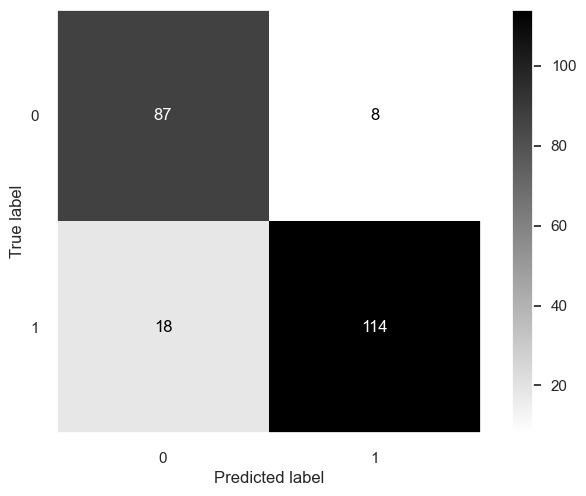

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Model
clf = RandomForestClassifier(
    n_estimators=124,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=None,
    bootstrap=False
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Reports
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))

# Correct confusion matrix plot
ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, cmap="binary"
)

plt.grid(False)
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.89      0.85        95
           1       0.92      0.84      0.88       132

    accuracy                           0.86       227
   macro avg       0.86      0.87      0.86       227
weighted avg       0.87      0.86      0.86       227


------------------------
Confusion Matrix
------------------------

[[ 85  10]
 [ 21 111]]


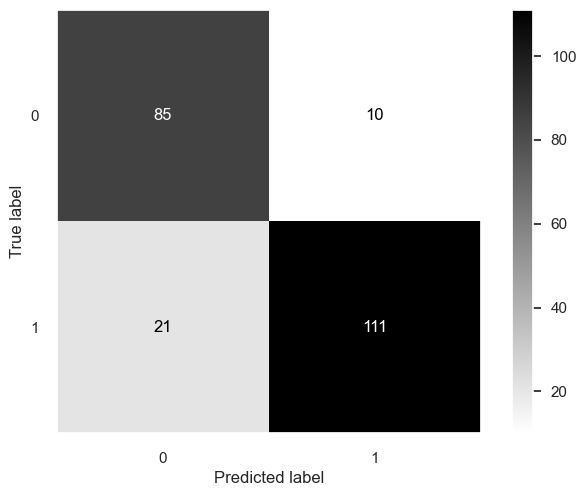

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clff = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=1,
    random_state=23
)

clff.fit(X_train, y_train)
y_pred = clff.predict(X_test)

print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))

# Correct confusion matrix plot
ConfusionMatrixDisplay.from_estimator(
    clff,
    X_test,
    y_test,
    cmap="binary"
)

plt.grid(False)
plt.show()


              precision    recall  f1-score   support

           0       0.80      0.89      0.85        95
           1       0.92      0.84      0.88       132

    accuracy                           0.86       227
   macro avg       0.86      0.87      0.86       227
weighted avg       0.87      0.86      0.86       227


------------------------
Confusion Matrix
------------------------

[[ 85  10]
 [ 21 111]]


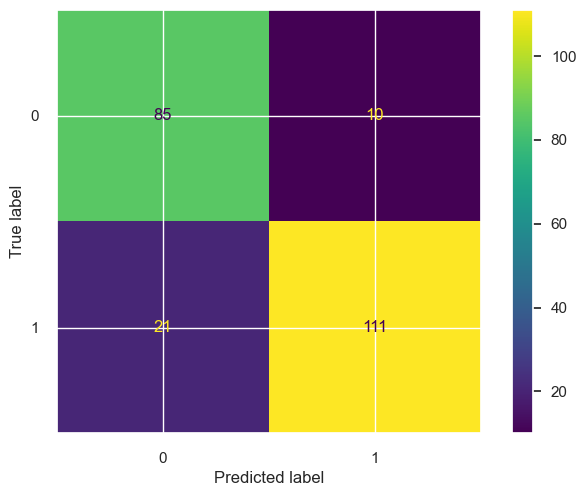

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

# Train the model
clff = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.2,
    max_depth=1,
    random_state=23
)

clff.fit(X_train, y_train)
y_pred = clff.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print('')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
print(confusion_matrix(y_test, y_pred))

# Confusion Matrix Plot
ConfusionMatrixDisplay.from_estimator(clff, X_test, y_test)
plt.show()

# Save model
pickle.dump(clff, open('heart.pkl', 'wb'))
